In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import scipy.stats 
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the dataset

df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# drop unwanted columns
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.shape

(200, 4)

In [6]:
# checking null values in dataset
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## Exploratory Data Analysis

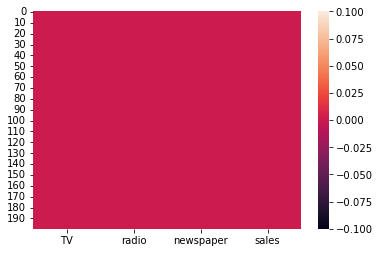

In [10]:
sns.heatmap(df.isnull())
plt.show()

In [12]:
# statistical description of dataset
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
cor = df.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


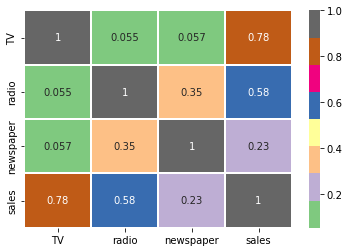

In [14]:
sns.heatmap(cor, cmap = 'Accent', annot = True, linewidth = 0.1)
plt.show()

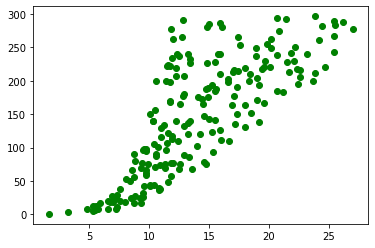

In [15]:
# heatmap shows god corelation between TV & sales,radio & sales whereas lowest corelation between Tv & radio, newspaper & TV.

plt.scatter(x = 'sales', y = 'TV', data = df, c = 'g')

# Above scatter plot shows, by 25 TV advertisements sales grew to 300.

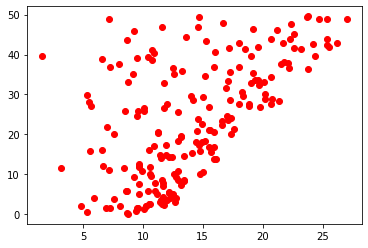

In [16]:
plt.scatter(x = 'sales', y = 'radio', data = df,c='r')

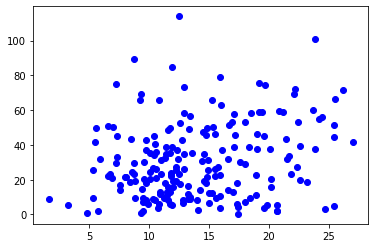

In [17]:
plt.scatter(x = 'sales', y = 'newspaper', data = df,c='b')

# Above scatter shows newspaper ads did not help grow sales substantially.

#Thus we can conclude that we have to focus on TV ad for increasing sales.

In [18]:

df['newspaper'] = np.sqrt(df['newspaper'])

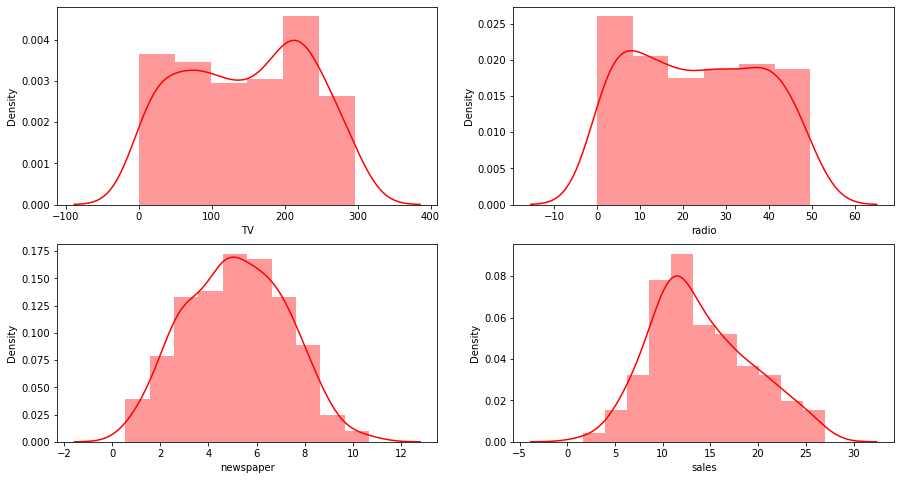

In [20]:
plt.figure(figsize=(15,8))
for i in enumerate(df):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]],color='r')

# above graphs show there is no more skewness in Newspaper and Sales.

In [19]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

In [22]:
x = df.drop(['newspaper','sales'], axis = 1)
y = df['sales']

In [24]:
print(x.shape)
print(y.shape)

(200, 2)
(200,)


In [25]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [26]:
pd.DataFrame(x).describe()

,0,1
count,200.000000,200.000000
mean,0.494902,0.469032
std,0.290342,0.299331
min,0.000000,0.000000
25%,0.249155,0.201109
50%,0.504058,0.461694
75%,0.737656,0.736391
max,1.000000,1.000000


# Modelling

In [31]:
LR = LinearRegression()

In [32]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.906590009997456
At random state 0, The test accuracy is: 0.8604541663186569


At random state 1, The training accuracy is: 0.8958528468776601
At random state 1, The test accuracy is: 0.8947344950027067


At random state 2, The training accuracy is: 0.9148698946311157
At random state 2, The test accuracy is: 0.7629335290913724


At random state 3, The training accuracy is: 0.8930073913590098
At random state 3, The test accuracy is: 0.914256556902537


At random state 4, The training accuracy is: 0.8911657617946168
At random state 4, The test accuracy is: 0.908662388749248


At random state 5, The training accuracy is: 0.8956551156995032
At random state 5, The test accuracy is: 0.8985603563634559


At random state 6, The training accuracy is: 0.8914984406883799
At random state 6, The test accuracy is: 0.9231606203241168


At random state 7, The training accuracy is: 0.8928993103144962
At random state 7, The test accuracy is: 0.90953639088428

# Random state 10 gives highest accuracy

In [69]:
#splitting the data into 75% training and 25% testing
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.25,random_state = 10)

In [70]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 2)
(50, 2)
(150,)
(50,)


In [71]:
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9236991141628922


In [72]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 6.113430712736471
MAE: 1.7873411287524383
r2_score: 0.7551985152865386


# Ridge

In [73]:
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.9189289094354655


In [74]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 6.701792464519096
MAE: 1.929100289128228
r2_score: 0.6878767226294777


In [75]:
dr=DecisionTreeRegressor()
svr=SVR() 
rf=RandomForestRegressor()

In [76]:
model=[LR, dr, svr, rf]

In [77]:
for m in model:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 10)
    m.fit(x_train, y_train)
    predl = m.predict(x_test)
    print('r2_score of',m,'is:')
    print(r2_score(y_test, predl))
    print('mean_squared_error:',mean_squared_error(y_test, predl))
    print('mean_absolute_error:',mean_squared_error(y_test, predl))
    print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test, predl)))
    print('\n')

r2_score of LinearRegression() is:
0.8574007040576865
mean_squared_error: 5.350726050111703
mean_absolute_error: 5.350726050111703
root_mean_squared_error 2.3131636453376365


r2_score of DecisionTreeRegressor() is:
0.9719770441844593
mean_squared_error: 1.0515000000000003
mean_absolute_error: 1.0515000000000003
root_mean_squared_error 1.0254267404354152


r2_score of SVR() is:
0.9020432133063875
mean_squared_error: 3.6756137320536384
mean_absolute_error: 3.6756137320536384
root_mean_squared_error 1.9171890183426459


r2_score of RandomForestRegressor() is:
0.9756173376326445
mean_squared_error: 0.9149059666666598
mean_absolute_error: 0.9149059666666598
root_mean_squared_error 0.956507170211839




In [78]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9989671382044939


In [79]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.8268487234716663
MAE: 0.5966138559771292
r2_score: 0.975186340000792


# cross validation

In [80]:
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 3.013919, 1.784129
R    : 3.084685, 1.945594
svr    : 3.665091, 2.710343
svr_p    : 3.450104, 1.096982
svr_r    : 1.110718, 0.961292
RF    : 0.468468, 0.213004
DTR    : 0.911000, 0.485048
GBR    : 0.481872, 0.282489


# Random forest regressor and Gradient boosting regressor are selected for GridCV search

In [48]:
RF = RandomForestRegressor()
param = {
     'criterion':['mse','mae'],
    'n_estimators':[100, 200],
    'max_depth':[1],
   'max_features' : ["sqrt", "log2",],
}

In [49]:
RF_grid = GridSearchCV(RandomForestRegressor(), param, cv = 10, scoring = 'accuracy', n_jobs = -1, verbose = 2)

In [50]:
RF_grid.fit(x_train,y_train)
RF_grid_pred=RF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [51]:
RF_grid.best_params_

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [52]:
print('MSE:',mean_squared_error(RF_grid_pred,y_test))
print('MAE:',mean_absolute_error(RF_grid_pred,y_test))
print('r2_score:',r2_score(RF_grid_pred,y_test))

MSE: 16.327049095328576
MAE: 3.300265796403577
r2_score: -2.938216977030245


<AxesSubplot:xlabel='sales', ylabel='Density'>

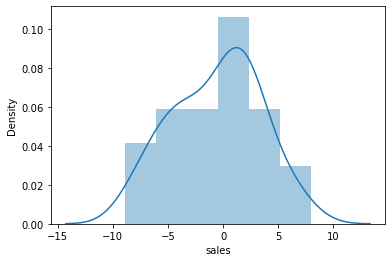

In [53]:
sns.distplot(RF_grid_pred-y_test)

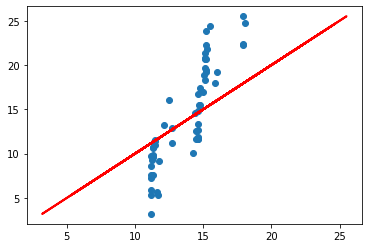

In [54]:
plt.scatter(RF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

# Gradient Boosting Regressor

In [59]:
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [60]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [61]:
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [62]:
RF_grid.best_params_

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [63]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 0.6280317166666666
MAE: 0.6230166666666661
r2_score: 0.9767624244935648


<AxesSubplot:xlabel='sales', ylabel='Density'>

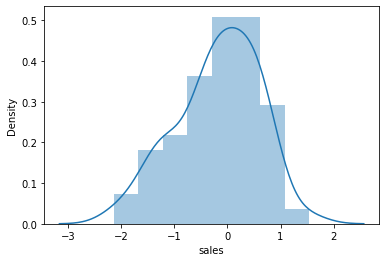

In [64]:
sns.distplot(GF_grid_pred-y_test)

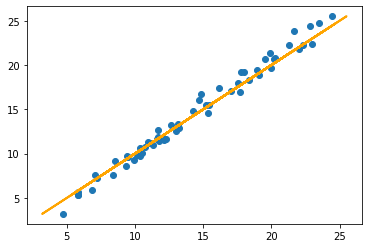

In [65]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Orange')

# above plot shows better distribution hence select this model and save it.

In [94]:
import joblib

joblib.dump(RF_grid.best_estimator_,'Advertising Sales Channel Prediction_Project.obj')

['Advertising Sales Channel Prediction_Project.obj']